In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/AIML_IITG/Datasets/gene_expression_ml.csv")

In [5]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

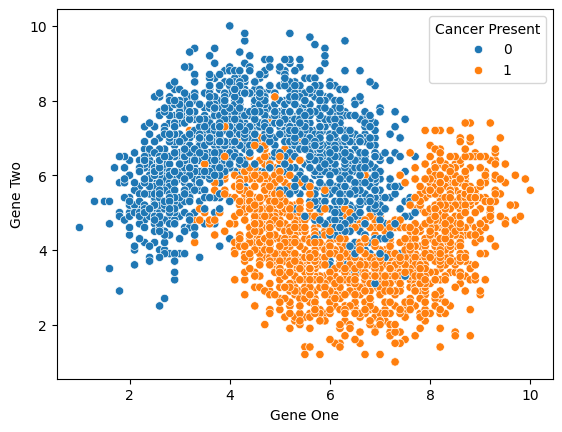

In [9]:
sns.scatterplot(x="Gene One",y="Gene Two",hue="Cancer Present",data=df)

In [10]:
df["Cancer Present"].value_counts()

,count
Cancer Present,
1,1500
0,1500


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop("Cancer Present",axis=1)
y = df["Cancer Present"]

In [13]:
X.head()

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4


In [14]:
y.head()

,Cancer Present
0,1
1,0
2,1
3,0
4,1


In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.3)

In [16]:
sc = StandardScaler()
x_tr_scaled = sc.fit_transform(x_train)
x_te_scaled = sc.transform(x_test)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
errors = []
for i in range(1,30):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_tr_scaled,y_train)
  pred = model.predict(x_te_scaled)
  error_rate = 1-accuracy_score(y_test,pred)
  errors.append(error_rate)

In [19]:
errors

[0.08333333333333337,
 0.0888888888888889,
 0.07111111111111112,
 0.06777777777777783,
 0.06555555555555559,
 0.06000000000000005,
 0.06444444444444442,
 0.06333333333333335,
 0.06666666666666665,
 0.06333333333333335,
 0.06888888888888889,
 0.06222222222222218,
 0.06444444444444442,
 0.06333333333333335,
 0.06666666666666665,
 0.06222222222222218,
 0.06000000000000005,
 0.061111111111111116,
 0.06333333333333335,
 0.06333333333333335,
 0.06222222222222218,
 0.06666666666666665,
 0.061111111111111116,
 0.05888888888888888,
 0.06222222222222218,
 0.06333333333333335,
 0.06222222222222218,
 0.061111111111111116,
 0.06222222222222218]

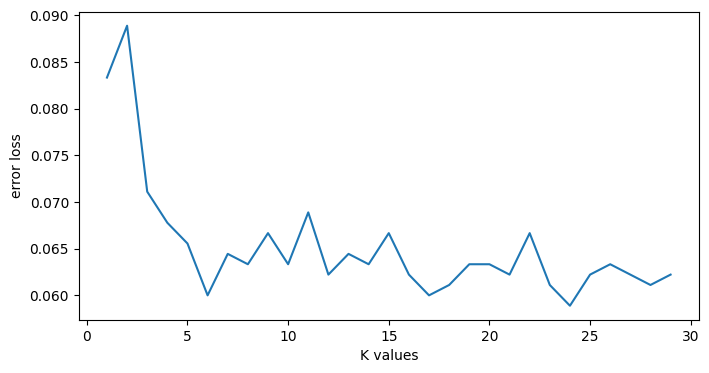

In [22]:
plt.figure(figsize=(8,4))
plt.plot(range(1,30),errors)
plt.xlabel("K values")
plt.ylabel("error loss")
plt.show()